<a href="https://colab.research.google.com/github/olanrewajufarooq/MIROceanographyAnalysis/blob/main/Oceanography_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis of the Oceanographic Data**

This notebook is used to analyse the data obtained from the Drifters and the CDT Casting on the Day 2 of the 2022/2023 Sea Trip. The information obtained is also compared with information from Day 1 and Day 3, likewise, the information from intake 1 (i.e. 2021/2022).

### Importing Necessary Modules for the Notebook

In [ ]:
# Python-based Libraries
import os
from datetime import timedelta, time
from math import sin, cos, sqrt, atan2, radians
import datetime as dt

# Data Analysis Libraries
import numpy as np
import pandas as pd

# Graph plotting libraries
import matplotlib.pyplot as plt
from matplotlib import cm
import folium

### Connecting to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Defining the path of the Group folder on Google Drive
path = "./drive/MyDrive/OceanographyAnalysis/"

# Check if the files are accessible
os.listdir(path)

['logsheet.xlsx',
 'Cleaned Drifters Data',
 'CTD Data',
 'Drifters Data',
 'Other Days Data',
 '.ipynb_checkpoints',
 'Last Year Data']

## Import Drifter Data



In [ ]:
# Initializing a Dictionary datatype that stores data for each Drifter
data = {}

# Iterate through all file
for file in os.listdir(f"{path}/Drifters Data"):

    # Data from the White Drifters are stored in ".csv" formats using "UTF-16 LE" Encoding
    if file.endswith(".csv"):
        
        data_key = file.split(".")[0][-4:] # Obtaining the name of the Drifter
        data_value = pd.read_csv(f'{path}/Drifters Data/{file}', encoding="UTF-16 LE") #The encoding is very important.
        data[data_key] = data_value # Storing the data in the "data" dictionary
    
    # Data from the Yellow Drifters are stored in ".txt" formats using "UTF-8" Encoding
    elif file.endswith(".txt"):
        
        data_key = file.split(".")[0][-3:] # Obtaining the name of the Drifter
        data_value = pd.read_csv(f'{path}/Drifters Data/{file}', encoding="UTF-8") #The encoding is very important.
        data[data_key] = data_value # Storing the data in the "data" dictionary

# Show the names of all drifters for which the data has been read
print(list(data.keys()))

['3368', '273', '7230', '8436', '6439', '274', '277', '0119', '2052']


### Import the Logsheet

In [ ]:
log_df = pd.read_excel(f"{path}/logsheet.xlsx")

# Convert the Deployment Time and the Time of Recovery to datetime objects in Pandas
log_df['Deployment Time'] = pd.to_datetime(log_df['Deployment Time'],format= '%H:%M:%S' ).dt.time
log_df['Time of Recovery'] = pd.to_datetime(log_df['Time of Recovery'],format= '%H:%M:%S' ).dt.time

log_df.head()

,Station No,Type,Name,Deployment Time,Long Deg,Long Min,Long Dir,Lat Deg,Lat Min,Lat Dir,Time of Recovery,Long Deg.1,Log Min,Long Dir.1,Lat Deg.1,Lat Min.1,Lat Dir.1
0,1,Drifter,274.0,09:47:00,5,58.363,E,43,4.655,N,12:40:00,5.0,57.564,E,43.0,4.783,N
1,1,Drifter,8436.0,09:47:00,5,58.363,E,43,4.655,N,12:32:00,5.0,57.185,E,43.0,4.708,N
2,1,Drifter,6439.0,09:47:00,5,58.363,E,43,4.655,N,12:42:00,5.0,57.571,E,43.0,4.803,N
3,2,Drifter,273.0,09:59:00,5,59.055,E,43,4.723,N,14:03:00,5.0,57.743,E,43.0,5.145,N
4,2,Drifter,7230.0,09:59:00,5,59.055,E,43,4.723,N,13:59:00,5.0,57.955,E,43.0,5.144,N


## **Data Cleaning**



### Converting the time from UTC to Paris Time

In [ ]:
# Checking the data from the yellow drifters
data['273'].head(3)

,Position time (UTC),Reception time (UTC),Latitude (°),Longitude (°),Speed (m/s),Course (°),Status,Battery (V),Temperature (°C)
0,2022-10-12 07:20:00,2022-10-12 07:20:21,43.10374,5.91212,4.16667,102.2,1,4.108,16.1
1,2022-10-12 07:30:00,2022-10-12 07:30:19,43.08793,5.92784,4.00278,85.9,1,4.107,16.9
2,2022-10-12 07:40:00,2022-10-12 07:40:26,43.08135,5.95918,4.58333,120.2,1,4.105,17.2


In [ ]:
# Converting the UTC time to Paris Time [For Yellow Drifters]

def DataClean_YDrifters(data_df):
    data_df['Position time (UTC)'] = pd.to_datetime(data_df['Position time (UTC)'])
    data_df['Reception time (UTC)'] = pd.to_datetime(data_df['Reception time (UTC)'])

    data_df['Position time'] = data_df['Position time (UTC)'] + timedelta(hours = 2)
    data_df['Reception time'] = data_df['Reception time (UTC)'] + timedelta(hours = 2)

    data_df = data_df.drop(labels=['Position time (UTC)', 'Reception time (UTC)', 'Course (°)', 'Reception time',
                                        'Status', 'Battery (V)'], axis=1)

    data_df = data_df.rename(columns={"Latitude (°)":"Latitude", "Longitude (°)":"Longitude", 
                      "Speed (m/s)":"Speed", "Temperature (°C)":"Temperature"}, inplace=False)
    
    data_df["Position time"] = data_df["Position time"].dt.time
    
    return data_df

DataClean_YDrifters(data["273"]).head()

,Latitude,Longitude,Speed,Temperature,Position time
0,43.10374,5.91212,4.16667,16.1,09:20:00
1,43.08793,5.92784,4.00278,16.9,09:30:00
2,43.08135,5.95918,4.58333,17.2,09:40:00
3,43.07754,5.97256,0.00000,17.6,09:50:00
4,43.07886,5.98378,0.59722,18.0,10:00:00


In [ ]:
# Checking the data from others
data['0119'].head(3)

,DeviceName,DeviceDateTime,BatteryStatus,CommId,Latitude,Longitude
0,0-4410119,2022-10-12 11:11:48,GOOD,0-4410119,43.08366,5.95759
1,0-4410119,2022-10-12 11:07:25,GOOD,0-4410119,43.08342,5.95843
2,0-4410119,2022-10-12 11:01:48,GOOD,0-4410119,43.08297,5.95946


In [ ]:
data['0119'].dtypes

DeviceName         object
DeviceDateTime     object
BatteryStatus      object
CommId             object
Latitude          float64
Longitude         float64
dtype: object

In [ ]:
# Converting the UTC time to Paris Time [For Other Drifters]

def DataClean_ODrifters(data_df):

    data_df['DeviceDateTime'] = pd.to_datetime(data_df['DeviceDateTime'])
    data_df['DeviceDateTime'] = data_df['DeviceDateTime'] + timedelta(hours = 2)

    data_df["Position time"] = pd.to_datetime(data_df["DeviceDateTime"]).dt.time
    
    data_df = data_df.drop(labels=['DeviceName', 'BatteryStatus', 'CommId', "DeviceDateTime"], axis=1)
    
    # Reversing the time to match Y drifter
    data_df_re = data_df[::-1].reset_index(drop = True) 
    
    return data_df_re

In [ ]:
# Clean all data

for key in data.keys():
    if len(key) == 3:
        data[key] = DataClean_YDrifters(data[key])
    elif len(key) == 4:
        data[key] = DataClean_ODrifters(data[key])

In [ ]:
data['277'].head()

,Latitude,Longitude,Speed,Temperature,Position time
0,43.10380,5.91181,3.96111,15.8,09:20:00
1,43.08799,5.92791,3.63611,16.8,09:30:00
2,43.08133,5.95918,4.63611,16.9,09:40:00
3,43.07751,5.97264,0.00000,17.2,09:50:00
4,43.07879,5.98421,0.00000,17.7,10:00:00


In [ ]:
data["0119"].head()

,Latitude,Longitude,Position time
0,43.10520,5.88573,09:07:29
1,43.10477,5.88992,09:11:51
2,43.10506,5.90206,09:16:52
3,43.10153,5.91541,09:21:51
4,43.09166,5.92094,09:26:55


### Extracting Data from Deployment Time to Recovery Time

In [ ]:
# Extract Data within the Deployment and Recovery time

def extractData(key, data, log_df):

    deploy_time = log_df["Deployment Time"][log_df["Name"] == float(key)]
    recov_time = log_df["Time of Recovery"][log_df["Name"] == float(key)]

    deploy_bool = np.array([(data[key]["Position time"][i] > deploy_time).to_numpy() for i in range(len(data[key]))]).flatten()
    recov_bool = np.array([(data[key]["Position time"][i] < recov_time).to_numpy() for i in range(len(data[key]))]).flatten()

    cleaning_bool = deploy_bool & recov_bool
    data[key] = data[key][cleaning_bool]
    data[key].reset_index(inplace = True)
    
    return data

In [ ]:
log_df["Deployment Time"][log_df["Name"] == float("0119")]

5    09:59:00
Name: Deployment Time, dtype: object

In [ ]:
log_df["Time of Recovery"][log_df["Name"] == float("0119")]

5    14:12:00
Name: Time of Recovery, dtype: object

In [ ]:
for key in data.keys():
    data = extractData(key, data, log_df)
    
# All data has been cleaned and extracted at this point

In [ ]:
data["0119"].tail()

,index,Latitude,Longitude,Position time
34,45,43.08254,5.96113,12:51:45
35,46,43.08281,5.96034,12:56:47
36,47,43.08297,5.95946,13:01:48
37,48,43.08342,5.95843,13:07:25
38,49,43.08366,5.95759,13:11:48


In [ ]:
data["277"].head()

,index,Latitude,Longitude,Speed,Temperature,Position time
0,6,43.08001,5.99907,0.0,20.4,10:20:00
1,7,43.07988,5.99818,0.0,20.7,10:30:00
2,8,43.07974,5.99750,0.0,20.7,10:40:00
3,9,43.07973,5.99668,0.0,20.8,10:50:00
4,10,43.07993,5.99578,0.0,20.8,11:00:00


## **Analysis**

### Computing the Trajectory Velocity

By: Chin

In [ ]:
# approximate radius of earth in km
R = 6373.0


# #input time values in HH:MM:SS, time2 must be greater than time1 obviously
# def calVelocity(lat1, lon1, lat2, lon2, time1, time2):
#     start=time1
#     end=time2
#     start_dt = dt.datetime.strptime(start, '%H:%M:%S')
#     end_dt = dt.datetime.strptime(end, '%H:%M:%S')
#     diff = (end_dt - start_dt) 
#     timediff = diff.seconds/60 
#     print(type(start_dt))

#     lat1 = radians(lat1)
#     lon1 = radians(lon1)
#     lat2 = radians(lat2)
#     lon2 = radians(lon2)

#     dlon = lon2 - lon1
#     dlat = lat2 - lat1

#     a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
#     c = 2 * atan2(sqrt(a), sqrt(1 - a))

#     distance = R * c
#     velocity = distance*1000/60/timediff

#     # print("Result:", distance)
#     # print(timediff)
#     return velocity
    
# calVelocity(43.08366,5.95759,43.08342,5.95843, "11:11:00", "11:14:00")

# create vectorize function to compute velocity
def calVelocity(data):
    # select columns for latitude, longtitude and time
    df_lat = np.array(data["Latitude"])
    df_long = np.array(data["Longitude"])
    df_time = data["Position time"]
    df_time = pd.to_datetime(df_time.astype(str), format='%H:%M:%S')
    
    # compute delta time
    d_time = np.array(df_time[1:]) - df_time[:-1]
    d_time = d_time.apply(lambda dt_i : dt_i.seconds/60.0)
    
    # compute distance from lat,long
    rad_lat = np.radians(df_lat)
    rad_long = np.radians(df_long)
    d_lat = rad_lat[1:] - np.array(rad_lat[:-1])
    d_long = rad_long[1:] - np.array(rad_long[:-1]) 
    
    a = np.sin(d_lat / 2.0)**2 + np.cos(rad_lat[:-1]) * np.cos(rad_lat[1:]) * np.sin(d_long / 2)**2
    c = 2.0 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    distance = R * c
    velocity = distance*1000.0/60.0/np.array(d_time, dtype=float)
    return pd.Series(np.append(0.0, velocity))

In [ ]:
for key in data.keys():
    data[key]["velocity"] = calVelocity(data[key])
    data[key].drop("index", inplace = True, axis = 1) # Dropping unncessary index
    data [key] = data[key].iloc[1:] # Removing the first row (where v = 0)

In [ ]:
data ['8436'].head()

,Latitude,Longitude,Position time,velocity
1,43.07685,5.97244,09:56:42,0.144393
2,43.07668,5.97191,10:01:41,0.157289
3,43.07680,5.97094,10:07:08,0.244439
4,43.07672,5.97034,10:11:43,0.180194
5,43.07665,5.96978,10:16:42,0.154380


### Exporting the Cleaned Data (with Velocities)

In [ ]:
for key in data.keys():
    data[key].to_csv(f'{path}/Cleaned Drifters Data/{key}.csv')

# All the cleaned data has been exported to a folder for any necessary external use

### Visualizing the Trajectories and Velocities on Graph
By: Farooq and Maria

In [ ]:
# Simple function to convert RGB to HEX color format
def rgb_to_hex(r, g, b):
  return ('#{:x}{:x}{:x}'). format(r, g, b)

rgb_to_hex(220, 220, 220)

'#dcdcdc'

In [ ]:
# rgb tuple to hexadecimal conversion
def rgb2hex(rgb):
    rgb = [hex(int(256*x)) for x in rgb]
    r, g, b = [str(x)[2:] for x in rgb]
    return f"#{r}{g}{b}"

In [ ]:
# Determining the minimum and maximum velocities in the entire data

min_vel = 50
max_vel = 0

for key in data.keys():
    min_value = np.min(data[key]["velocity"])
    max_value = np.max(data[key]["velocity"])

    min_vel = min_value if min_value < min_vel else min_vel
    max_vel = max_value if max_value > max_vel else max_vel


min_vel, max_vel

(0.025626215489519835, 0.3405533501074622)

Plotting the Trajectories and Velocities for Each Drifter

In [ ]:
min_lat = 100
max_lat = 0
min_log = 100
max_log = 0

for key in data.keys():
    min_lat_val = np.min(data[key]["Latitude"])
    min_lon_val = np.min(data[key]["Longitude"])
    max_lat_val = np.max(data[key]["Latitude"])
    max_lon_val = np.max(data[key]["Longitude"])

    

In [ ]:
# Initializing the Map
map = folium.Map(location = [ data[key]["Latitude"][1], data[key]["Longitude"][1] ],
                                        zoom_start = 14.5)

In [ ]:
def plot_vel_traj(map, df):
    folium.Marker([ data[key]["Latitude"][1], data[key]["Longitude"][1] ],
              #popup = key,
              icon=folium.DivIcon(html=f"""<div style="font-family: courier new; color: blue">{f"{key}"}</div>""")
              ).add_to(map)
 
    folium.Marker([ data[key]["Latitude"].iloc[-1], data[key]["Longitude"].iloc[-1] ],
              #popup = folium.Popup(f'{key}', parse_html=True),
              icon=folium.DivIcon(html=f"""<div style="font-family: courier new; color: blue">{f"{key} end"}</div>""")
              ).add_to(map)

    color_mapper = cm.ScalarMappable(cmap=cm.OrRd)
    rgb_values = [c[:3] for c in color_mapper.to_rgba(data[key]["velocity"])] # keep rgb and drop the "a" column
    colors = [rgb2hex(rgb) for rgb in rgb_values]

    start = False

    for lat, lon, vel, col in zip(data[key]["Latitude"], data[key]["Longitude"], data[key]["velocity"], colors):
        if start:
            folium.PolyLine([[prev_lat, prev_long], [lat, lon]], color='white', weight=2
                            ).add_to(map)
        else:
            start = True

        prev_lat = lat
        prev_long = lon

        folium.CircleMarker(location=(lat,lon),radius=4, fill=True, fill_color=col, 
                            fill_opacity=0.7, stroke=False).add_to(map)

    return map

In [ ]:
for key in data.keys():
    map = plot_vel_traj(map, data[key])


map

### Analysis of Drifter Types

### Analysis of Circulation

### Analysis of the Daily Variability

## **CTD Data Analysis**

### Import and Clean the CTD Data
By Haleem and Aduragbemi

In [ ]:
# Initializing a Dictionary datatype that stores data for each Drifter
ctd_data = {}

# Iterate through all file
for id, fil in enumerate(os.listdir(f"{path}/CTD Data")):
    data_key = str(id + 1) # Obtaining the name of the Drifter
    data_value = pd.read_csv(f'{path}/CTD Data/{fil}', encoding="UTF-8") #The encoding is very important.
    data[data_key] = data_value # Storing the data in the "data" dictionary

# Show the names of all drifters for which the data has been read
print(list(data.keys()))

ParserError: ignored

In [ ]:
%matplotlib inline
from seabird.cnv import fCNV


#one_file = f'{path}/CTD Data/ST1_D2.cnv'

profile = fCNV(f'{path}/CTD Data/ST1_D2.cnv')
print(type(profile))


print("Header: %s" % profile.attributes.keys())

print('*' * 20)
print(profile.attributes)
print('*' * 20)
print(profile.keys())




df = profile.as_DataFrame()
df.head()










#with open(one_file, 'r') as f:
#     print(f.read())

<class 'seabird.cnv.fCNV'>
Header: dict_keys(['sbe_model', 'seasave', 'instrument_type', 'nquan', 'nvalues', 'start_time', 'bad_flag', 'file_type', 'md5', 'datetime', 'filename'])
********************
{'sbe_model': '9', 'seasave': 'V 7.26.7.121', 'instrument_type': 'CTD', 'nquan': '7', 'nvalues': '27893', 'start_time': 'Oct 12 2022 09:01:29 [System UTC, header]', 'bad_flag': '-9.990e-29', 'file_type': 'ascii', 'md5': '5a39b689b218610f028d560b98e67b04', 'datetime': datetime.datetime(2022, 10, 12, 9, 1, 29), 'filename': 'ST1_D2.cnv'}
********************
['PRES', 'TEMP', 'PSAL', 'oxygenvoltage', 'oxygen_ml_L', 'sbox0Mm/Kg', 'flag']


KeyError: ignored

By Haleem


ST4_D2.cnv
ST2_D2.cnv
ST3_D2.cnv
ST1_D2.cnv


Text(0.5, 0, 'Temperature (°C)')

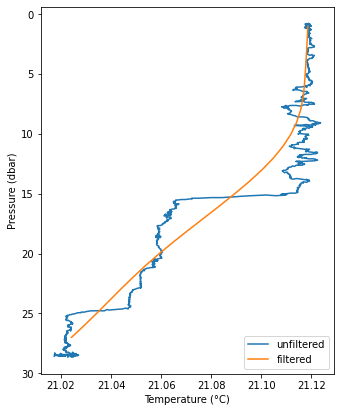

In [ ]:
import ctd

for file in os.listdir(f"{path}/CTD Data"):
    print(file)
CTD_path=path+"CTD Data"
CTD_data = ctd.from_cnv(CTD_path+"/ST4_D2.cnv")
up,down = CTD_data.split()
up
temperature = up['t090C']
fig, ax = plt.subplots(figsize=(5.5, 6))
temperature.plot_cast(ax=ax, label="unfiltered")
temperature.remove_above_water()\
           .despike()\
           .lp_filter()\
           .press_check()\
           .interpolate(method='index',
                        limit_direction='both',
                        limit_area='inside')\
           .bindata(delta=1, method='interpolate')\
           .smooth(window_len=21, window='hanning') \
           .plot_cast(ax=ax,label="filtered")
ax.legend(loc="lower right")
ax.set_ylabel('Pressure (dbar)')
ax.set_xlabel('Temperature (°C)')


Text(0.5, 0, 'Salinity (g kg$^{-1}$)')

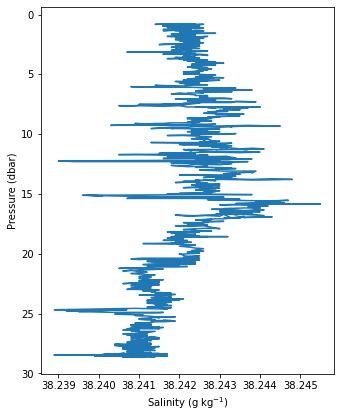

In [ ]:
fig, ax = plt.subplots(figsize=(5.5, 6))
salinity=up['sal00']
salinity.plot_cast()
ax.set_ylabel('Pressure (dbar)')
ax.set_xlabel('Salinity (g kg$^{-1}$)')


In [ ]:
proc = (
    down.remove_above_water()
    .remove_up_to(idx=7)
    .despike(n1=2, n2=20, block=100)
    .lp_filter()
    .press_check()
    .interpolate()
    .bindata(delta=1, method="interpolate")
    .smooth(window_len=21, window="hanning")
)

### Plot the T-S Profile

### Compare the Outputs with 2021 Data